<a href="https://colab.research.google.com/github/prakash4191/project_hotelbooking/blob/main/Project_Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question:

Have you ever wondered when the best time of year to book a hotel room is?

 Or the optimal length of stay in order to get the best daily rate? 
 
 What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.



-What are the Top 10 Countries of Origin of Hotel visitors (Guests)
-Which Month is the Most Occupied with Bookings at the Hotel?

-How many Bookings were Cancelled at the Hotel?

-Which Month Has Highest Number of Cancellations By Hotel Type?

-How many Bookings were Cancelled by Hotel Type?

-Relationship between Average Daily Rate(ADR) and Arrival Month by Booking Cancellation Status

-Total Number of Bookings by Market Segment

-Arrival Date Year vs Lead Time By Booking Cancellation Status

-Relationship between Special Requests and Cancellations

-How does the ADR Vary Over the Year by Hotel Type

-What is the Effect of Deposit Type on Cancellations
- % of customer requrired for parking spaces
- 



In [ ]:
#importing pandas,numpy,seaborn,matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2.Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.

3.Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

4.Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.

5.Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [ ]:
#Mounting google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mounting path of data from google drive and reading csv file 

hb=pd.read_csv('/content/drive/MyDrive/DS/PROJECT/HOTEL BOOKING/Copy of Hotel Bookings.csv')

In [ ]:
# Extracting infromation from 
hb.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
hb.shape

(119390, 32)

In [ ]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hb.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

In [ ]:
hb.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

In [ ]:
hb.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
hb['children'].fillna(0,inplace=True)
hb['country'].fillna('xyz',inplace=True)


In [ ]:
hb.drop(['agent','company'],axis=1,inplace=True)

In [ ]:
hb.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
hb['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
hb['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

# 1.What are the Top 10 Countries of Origin of Hotel visitors (Guests)

In [ ]:
hb['country'].value_counts().head(10)


PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0.5, 0, 'Pcountry')

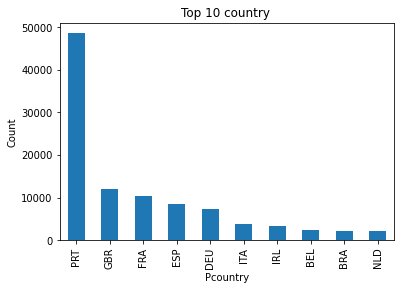

In [ ]:
hb2 = hb["country"].value_counts().head(10)
hb2.plot(kind='bar')

plt.title('Top 10 country ')
plt.ylabel('Count')
plt.xlabel('Pcountry')

2.Which Month is the Most Occupied with Bookings at the Hotel?

In [ ]:
hb['arrival_date_month'].value_counts().sort_index(ascending=True)



April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: arrival_date_month, dtype: int64

In [ ]:

hb['arrival_date_month'].sort_index(ascending=False).value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0.5, 0, 'Pcountry')

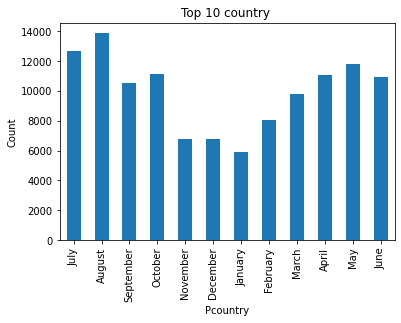

In [ ]:
hb3=hb['arrival_date_month'].value_counts(sort=False)
hb3.plot(kind='bar')

plt.title('Top 10 country ')
plt.ylabel('Count')
plt.xlabel('Pcountry')

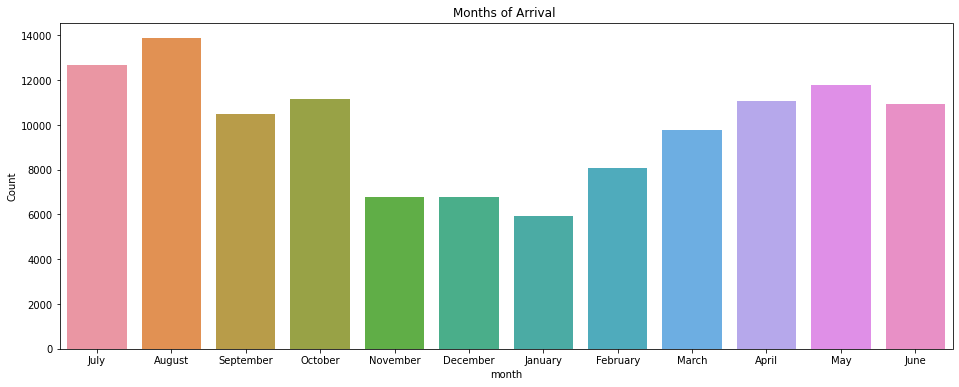

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month', data= hb)

plt.title('Months of Arrival ')
plt.ylabel('Count')
plt.xlabel('month')
plt.show()

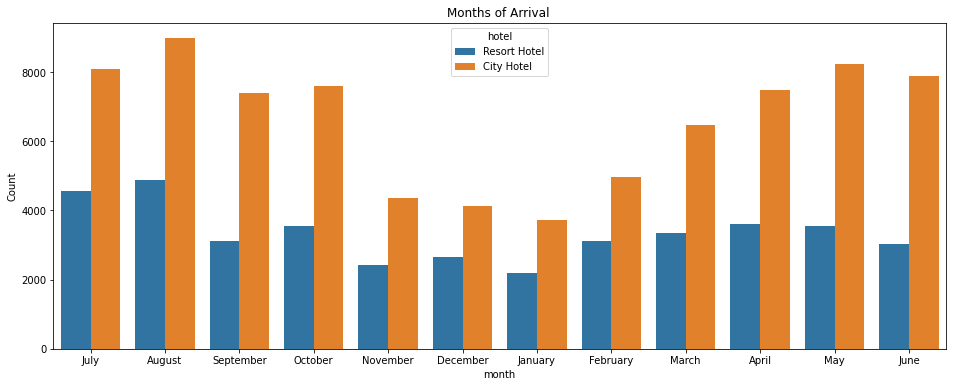

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= hb)

plt.title('Months of Arrival ')
plt.ylabel('Count')
plt.xlabel('month')
plt.show()

#3.How many Bookings were Cancelled at the Hotel?

In [ ]:
hb['is_canceled'].value_counts()

hb01=hb['is_canceled'].value_counts()

# 0 non-cancel 
# 1 cancel

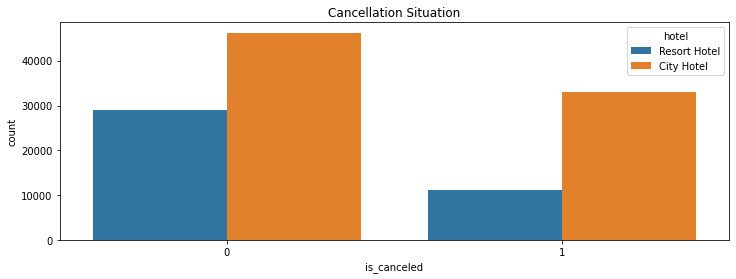

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='is_canceled', hue = 'hotel', data= hb)
plt.title('Cancellation Situation')
plt.show()

Text(0.5, 0, 'Pcountry')

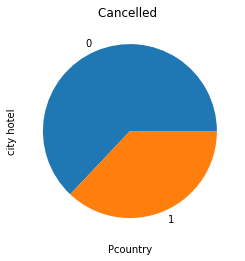

In [ ]:
hb3=hb['is_canceled'].value_counts()
hb3.plot(kind='pie')

plt.title('Cancelled ')
plt.ylabel('city hotel')
plt.xlabel('Pcountry')

Text(0, 0.5, 'ADR')

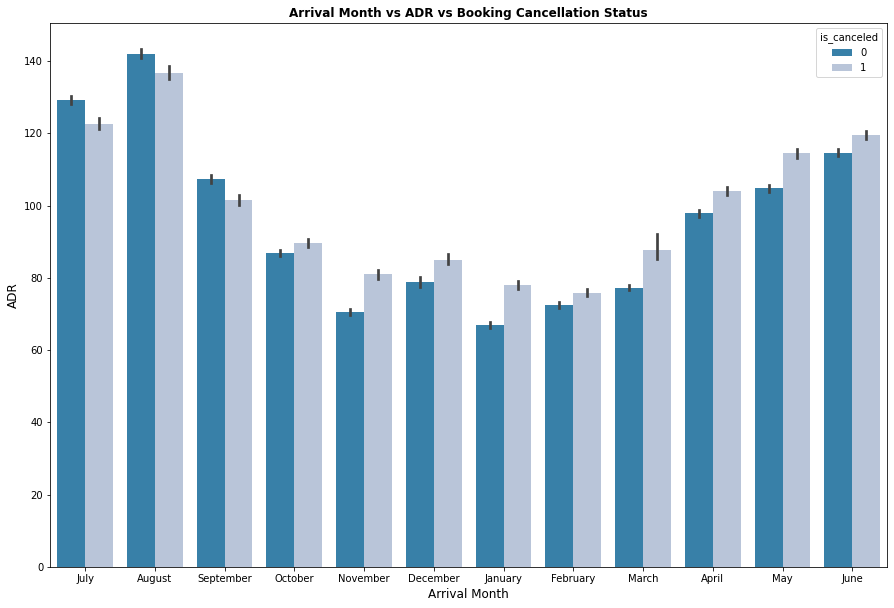

In [ ]:
hb['adr'] = hb['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=hb)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

Text(0, 0.5, 'lead_time')

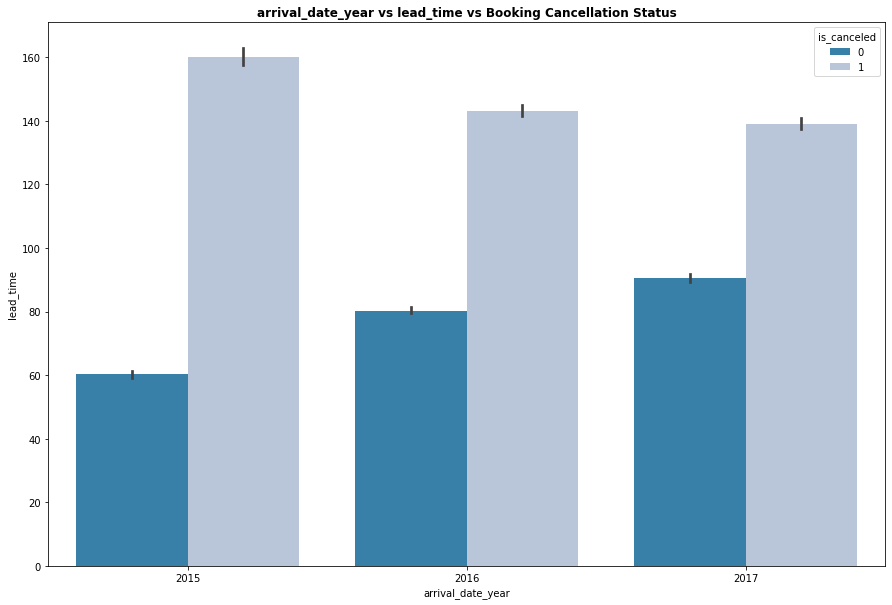

In [ ]:
hb['lead_time'] = hb['lead_time'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=hb)
plt.title('arrival_date_year vs lead_time vs Booking Cancellation Status', weight='bold')
plt.xlabel('arrival_date_year', fontsize=10)
plt.ylabel('lead_time', fontsize=10)

Text(0, 0.5, 'deposit_type')

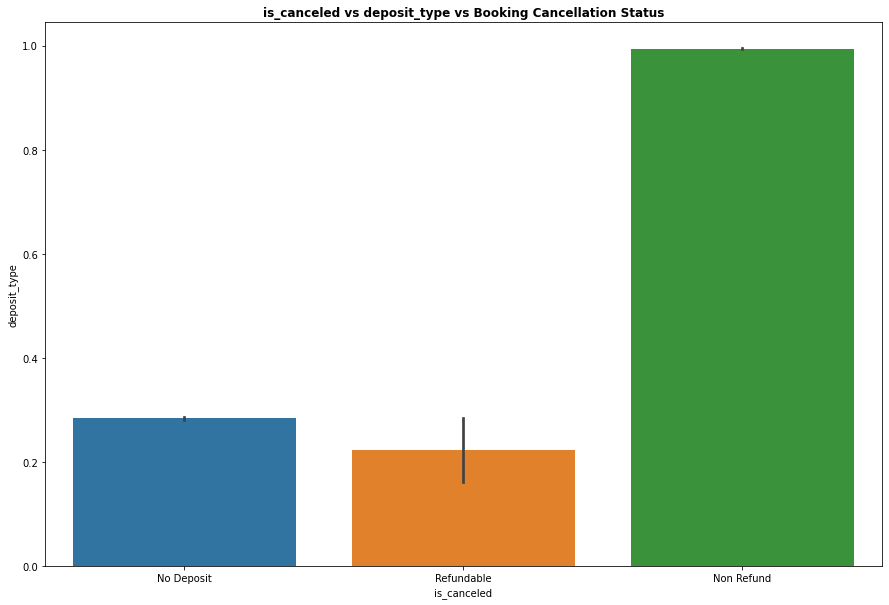

In [ ]:
hb['deposit_type'] = hb['deposit_type']
plt.figure(figsize=(15,10))
sns.barplot(x='deposit_type', y='is_canceled', data=hb)
plt.title('is_canceled vs deposit_type vs Booking Cancellation Status', weight='bold')
plt.xlabel('is_canceled', fontsize=10)
plt.ylabel('deposit_type', fontsize=10)

ValueError: ignored

#4.Which Month Has Highest Number of Cancellations By Hotel Type?

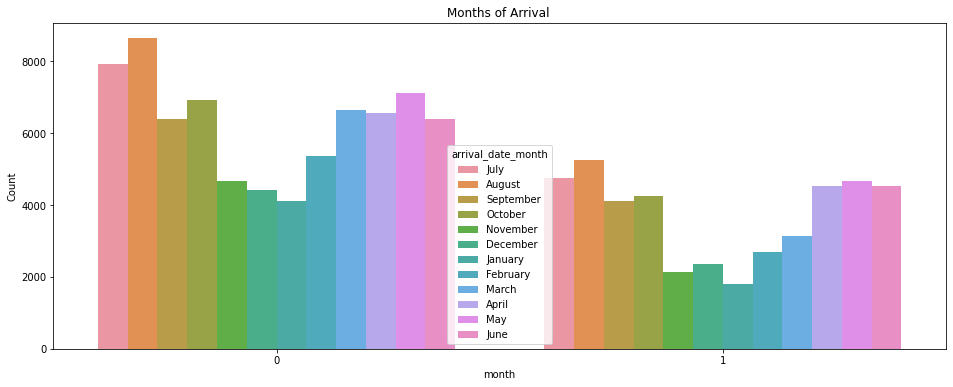

In [ ]:
# need to modify

plt.figure(figsize=(16,6))
sns.countplot(x='is_canceled', hue = 'arrival_date_month', data= hb)

plt.title('Months of Arrival ')
plt.ylabel('Count')
plt.xlabel('month')
plt.show()

In [ ]:
hb['hotel'].value_counts().head()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

#5.Total Number of Bookings by Market Segment

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Name: market_segment, dtype: int64


Text(0.5, 0, 'Segment')

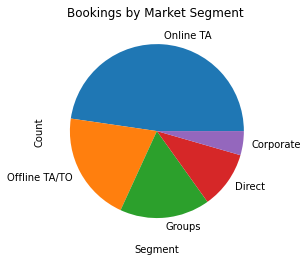

In [ ]:
# need to add % or values

hb['market_segment'].value_counts().head()

hb3 = hb['market_segment'].value_counts().head()
print(hb3)
hb3.plot(kind='pie')

plt.title('Bookings by Market Segment ')
plt.ylabel('Count')
plt.xlabel('Segment')

#6.Arrival per year 

2015    21996
2016    56707
2017    40687
Name: arrival_date_year, dtype: int64


Text(0.5, 0, 'Year')

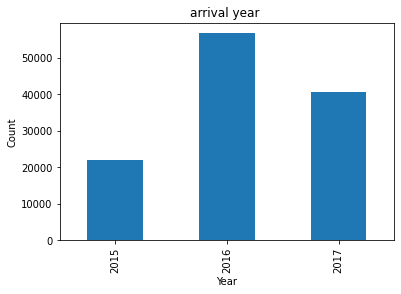

In [ ]:
hb['arrival_date_year'].sort_index().value_counts(sort=False)

hb4 = hb['arrival_date_year'].sort_index().value_counts(sort=False)
print(hb4)
hb4.plot(kind='bar')

plt.title('arrival year ')
plt.ylabel('Count')
plt.xlabel('Year')

#7.Arrival Date Year vs Lead Time By Booking Cancellation Status

In [ ]:
hb['adr'] = hb['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette='PuBu_r', data=hb)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)



In [ ]:
hb.groupby(['arrival_date_month'])['adr'].sum()

arrival_date_month
April        1113122.58
August       1944327.60
December      549700.54
February      593661.80
January       417171.80
July         1605263.03
June         1276277.11
March         790176.45
May          1281628.83
November      501362.97
October       981063.09
September    1103861.80
Name: adr, dtype: float64

In [ ]:
booking_per_year = hb.groupby(['arrival_date_year','reserved_room_type'])['arrival_date_year'].count().unstack()

booking_per_year.sort_index()

reserved_room_type,A,B,C,D,E,F,G,H,L,P
arrival_date_year,,,,,,,,,,
2015,17720.0,244.0,171.0,2186.0,953.0,374.0,260.0,82.0,6.0,NaN
2016,40718.0,672.0,282.0,9421.0,2881.0,1424.0,997.0,306.0,NaN,6.0
2017,27556.0,202.0,479.0,7594.0,2701.0,1099.0,837.0,213.0,NaN,6.0


In [ ]:
hb.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342.0,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737.0,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7.0,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13.0,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14.0,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14.0,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0.0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9.0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85.0,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75.0,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
booking_per_month = hb.groupby(['arrival_date_month','arrival_date_year'])['arrival_date_year'].count().unstack()

booking_per_month.sort_index()

Text(0.5, 0, 'year')

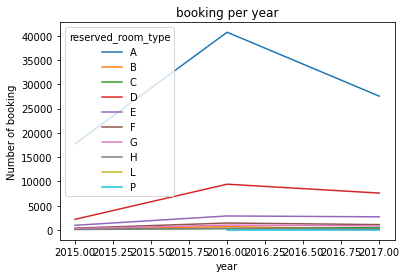

In [ ]:
booking_per_year.plot(kind='line')

plt.title('booking per year')
plt.ylabel('Number of booking')
plt.xlabel('year')
# plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
hb.info()

In [ ]:
booking_per_month = hb.groupby(['stays_in_weekend_nights','stays_in_week_nights']).count().unstack()

booking_per_month

:repeate_guest

In [ ]:
hb['is_repeated_guest'].value_counts()

repeate_guest = hb.groupby(['arrival_date_month','is_repeated_guest'])['is_repeated_guest'].count().unstack()

repeate_guest.sort_index()



In [ ]:
a=115580+3810
a

In [ ]:
hb['adults'].value_counts()

In [ ]:
hb1= hb.copy()
hb1['hotel'].value_counts()

In [ ]:
hb1['arrival_date_month'].value_counts()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= hb1)
plt.title('Months of Arrival')


In [ ]:
hb1['arrival_date_year'].value_counts()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='country', hue = 'hotel', data= hb2)
plt.title('People from top travelling countries')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
hb.country_counts(normalize=True).plot(kind="bar",color='g')
                                                         
plt.show()

#hb.isna().sum()

#hb.dropna(inplace=True)
#hb.isna().sum()

In [ ]:
hb.describe

In [ ]:
hb.info()

In [ ]:
hb.shape

In [ ]:
hb.columns

In [ ]:
list(hb['hotel'].unique())

In [ ]:
hb['booking_changes'].describe()

In [ ]:
sns.distplot(hb['booking_changes']);